In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np 
import matplotlib.pyplot as plt
import json
from PIL import Image

### Model in Tensorflow for (128x128x3) Input

In [2]:
test_tensor = tf.random.normal([1,128,128,3])
test_tensor = tf.cast(test_tensor, tf.float32)

In [3]:
##dummy model 
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(2)
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        print(x.shape)

        return self.d2(x)

# Create an instance of the model
model = MyModel()

In [4]:
result_128 = model(test_tensor)

(1, 508032)


In [5]:
print(result_128)

tf.Tensor([[-0.05465896 -0.06782109]], shape=(1, 2), dtype=float32)


In [6]:
model.save('/Users/prakanshulsaxena/Downloads/task_1_GSoC/temp_model')

(None, 508032)
(None, 508032)
(None, 508032)
(None, 508032)


INFO:tensorflow:Assets written to: /Users/prakanshulsaxena/Downloads/task_1_GSoC/temp_model/assets


INFO:tensorflow:Assets written to: /Users/prakanshulsaxena/Downloads/task_1_GSoC/temp_model/assets


In [7]:
converter = tf.lite.TFLiteConverter.from_saved_model('/Users/prakanshulsaxena/Downloads/task_1_GSoC/temp_model') # path to the SavedModel directory
tflite_model = converter.convert()

In [8]:
with open('/Users/prakanshulsaxena/Downloads/task_1_GSoC/model.tflite', 'wb') as f:
    f.write(tflite_model)

In [9]:
interpreter = tf.lite.Interpreter('/Users/prakanshulsaxena/Downloads/task_1_GSoC/model.tflite')

In [10]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [11]:
interpreter.set_tensor(input_details[0]['index'], test_tensor)
interpreter.invoke()

In [12]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[-0.05465391 -0.06781992]]


#### Function 
#### Input-> Image Path and Path of TFLite Model (resize daalna hai)
#### Output-> X and Y Coordinates

In [13]:
#Input the image location and model location in the below variables
#Run the cell with the function definition
#Here it is assumed that the image size is 128x128 
#To convert the image to the respective size, we can use this link - https://safeimagekit.com/resize-image-to-128x128

In [ ]:
IMAGE_LOCATION = 'image location'
MODEL_LOCATION = 'model location'

In [14]:
def query_gmodel(image_path,model_path):
    interpreter = tf.lite.Interpreter(model_path)
    
    image = Image.open(image_path)
    image = np.asarray(image)
    image_t = tf.convert_to_tensor(image)
    image_t = tf.expand_dims(image_t, 0)
    
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], image_t)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data    

In [15]:
#Running the cell below will provide the output of the model 

In [ ]:
out_test_1 = query_gmodel(image_path,model_path)
print('Output')
print(out_test_1)

#### Function
#### Input -> Image as Numpy Array and Path of TFLite Model 
#### Output -> X and Y Coordinates

In [16]:
#Input the image location and model location in the below variables
#Run the cell with the function definition
#Here it is assumed that the image size is 128x128 
#To convert the image to the respective size, we can use this link - https://safeimagekit.com/resize-image-to-128x128

In [ ]:
image = Image.open('image_path') #Enter the image location here 
image_as_np = np.asarray(image)
#Here it is assumed that the size of the image is 128x128

In [17]:
def query_gmodel_np(image_nparray,model_path):
    interpreter = tf.lite.Interpreter(model_path)
    
    image_t = tf.convert_to_tensor(image_nparray)
    image_t = tf.expand_dims(image_t, 0)
    
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], test_tensor)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data    

In [18]:
#Running the cell below will provide the output of the model 

In [ ]:
out_test_2 = query_gmodel_np(image_as_np,model_path)
print(out_test_2)

#### Function 
#### Input-> Image Path (For a file structure similar to Gazetrack Dataset) and Path of TFLite Model
#### Output-> Comparision by Visualization (Predicted vs Ground Truth Value)

In [19]:
#Input the image location and model location in the below variables
#Run the cells below with the function definitions
#Here it is assumed that the image size is 128x128 and the image is stored according to the file structure of gazetrack dataset
#For this I have provided one test image with the path - ./task_1_GSoC/gazetrack/test/images/03467__00771_1.jpeg

In [20]:
def get_img_id(PATH):
    temp_list = re.split('/',PATH)
    length = len(temp_list)
    x = temp_list[length-1]
    id_img = x.split('.')[0]
    return id_img

In [21]:
def get_gt_gaze(IMAGE_PATH):
    test_img_path = IMAGE_PATH
    initial_dir = re.split('/images',a)[0]
    image_id = get_img_id(test_img_path)
    final_path = initial_dir + '/meta' + '/' + image_id +'.json'
    final_path
    test_meta = json.load(open(final_path))
    test_meta
    gt = np.array([test_meta['dot_xcam'],test_meta['dot_y_cam']])
    return gt

In [22]:
def comp_visualize(image_path,model_path):
    interpreter = tf.lite.Interpreter(model_path)
    
    image_t = tf.convert_to_tensor(image_nparray)
    image_t = tf.expand_dims(image_t, 0)
    
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], test_tensor)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    output_data = output_data.reshape(2,)
    gaze_gt = get_gt_gaze(image_path)
    
    plt.figure(figsize=(12,12))
    plt.grid(color='gray', linestyle='dashed')
    plt.scatter(0, 0, marker='*', s=200)
    plt.scatter(output_data[0], output_data[1], c='red', s=10)
    plt.scatter(gaze_gt[0], gaze_gt[1], c='blue', marker='+', s=200)
    #red is the predicted value
    #blue if the ground truth value 
    plt.xlabel('distance from the camera at origin in x direction (cm)')
    plt.ylabel('distance from the camera at origin in y direction (cm)')
    plt.axis('scaled')
    plt.xlim(-2.5, 4)
    plt.ylim(-13, 0.2)

### Input Conversion to tf.example protocol buffer

In [23]:
IMAGE_LOCATION = b'/Users/prakanshulsaxena/Downloads/task_1_GSoC/gazetrack/train/images/00342__00074.jpg'
TFLITE_LOCATION = b'/Users/prakanshulsaxena/Downloads/task_1_GSoC/model.tflite'

In [24]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [25]:
feature_test = _bytes_feature(b'test_string')
feature_test.SerializeToString()

b'\n\r\n\x0btest_string'

In [26]:
def serialize_example(feature0, feature1):
    
    feature = {
          'feature0': _bytes_feature(feature0),
          'feature1': _bytes_feature(feature1),
      }
    
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [27]:
serialized_example = serialize_example(IMAGE_LOCATION,TFLITE_LOCATION)
serialized_example

b'\n\xb3\x01\ne\n\x08feature0\x12Y\nW\nU/Users/prakanshulsaxena/Downloads/task_1_GSoC/gazetrack/train/images/00342__00074.jpg\nJ\n\x08feature1\x12>\n<\n:/Users/prakanshulsaxena/Downloads/task_1_GSoC/model.tflite'

In [28]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

features {
  feature {
    key: "feature0"
    value {
      bytes_list {
        value: "/Users/prakanshulsaxena/Downloads/task_1_GSoC/gazetrack/train/images/00342__00074.jpg"
      }
    }
  }
  feature {
    key: "feature1"
    value {
      bytes_list {
        value: "/Users/prakanshulsaxena/Downloads/task_1_GSoC/model.tflite"
      }
    }
  }
}

### Visualization (Gazetrack Dataset)

In [29]:
image_vis = Image.open('/Users/prakanshulsaxena/Downloads/task_1_GSoC/gazetrack/train/images/00342__00074.jpg')
meta_vis = json.load(open('/Users/prakanshulsaxena/Downloads/task_1_GSoC/gazetrack/train/meta/00342__00074.json'))

In [30]:
lx, ly, lw, lh = meta_vis['leye_x'], meta_vis['leye_y'], meta_vis['leye_w'], meta_vis['leye_h']
rx, ry, rw, rh = meta_vis['reye_x'], meta_vis['reye_y'], meta_vis['reye_w'], meta_vis['reye_h']

In [31]:
l_eye = image_vis.crop((max(0, lx), max(0, ly), max(0, lx+lw), max(0, ly+lh)))
r_eye = image_vis.crop((max(0, rx), max(0, ry), max(0, rx+rw), max(0, ry+rh)))

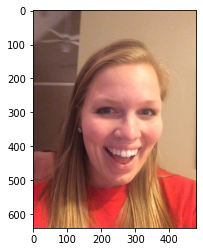

In [32]:
plt.imshow(image_vis)

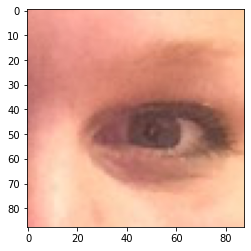

In [33]:
plt.imshow(l_eye)

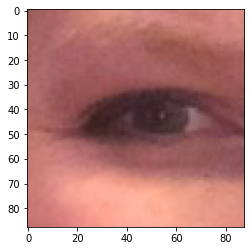

In [34]:
plt.imshow(r_eye)

In [35]:
meta_vis

{'device': 'iPhone 5S',
 'screen_h': 568,
 'screen_w': 320,
 'face_valid': 1,
 'face_x': 126,
 'face_y': 202,
 'face_w': 293,
 'face_h': 293,
 'leye_x': 277,
 'leye_y': 252,
 'leye_w': 88,
 'leye_h': 88,
 'reye_x': 163,
 'reye_y': 252,
 'reye_w': 88,
 'reye_h': 88,
 'dot_xcam': -0.3800530871,
 'dot_y_cam': -5.29991858007,
 'dot_x_pix': 136.476404667,
 'dot_y_pix': 266.117242336,
 'reye_x1': 195,
 'reye_y1': 297,
 'reye_x2': 247,
 'reye_y2': 303,
 'leye_x1': 308,
 'leye_y1': 306,
 'leye_x2': 353,
 'leye_y2': 302}